In [62]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, Literal
from langchain_ollama import ChatOllama

In [63]:
llm = ChatOllama(model="gemma3:1b", temperature=0.7)
llm2 = ChatOllama(model="gemma3:1b", temperature=0)

In [64]:
class AgentState(TypedDict):
    query: Annotated[HumanMessage, "The user's query"]
    category: Annotated[Literal['technical', 'emotional', 'spiritual',
                                'logical', 'psychological', 'historical'], "The category of the query"]
    response: Annotated[AIMessage, "The agent's response"]

In [65]:
# agents
def technical_agent(state: AgentState) -> AgentState:
    print("✅✅Technical agent invoked")

    system_prompt = SystemMessage(content="""
    You are a senior technical expert.

    Rules:
    - Explain clearly and step by step
    - Use simple language first, then deeper details if needed
    - Include examples or code when helpful
    - Avoid unnecessary theory

    Goal: Solve the user's technical problem accurately and practically.
    """)

    user_prompt = state['query']

    response = llm.invoke([system_prompt, user_prompt])

    state['response'] = response
    return {"response": response}


def emotional_agent(state: AgentState) -> AgentState:
    print("✅✅Emotional agent invoked")

    system_prompt = SystemMessage(content="""
    You are a compassionate and supportive listener.

    Rules:
    - Acknowledge the user's feelings first
    - Respond warmly and respectfully
    - Offer comfort, perspective, or gentle advice
    - Never judge or dismiss emotions

    Goal: Make the user feel understood and supported.
    """)

    user_prompt = state['query']

    response = llm.invoke([system_prompt, user_prompt])

    return {"response": response}


def spiritual_agent(state: AgentState) -> AgentState:
    print("✅✅Spiritual agent invoked")

    system_prompt = SystemMessage(content="""
    You are a calm spiritual guide.

    Rules:
    - Give meaningful life guidance
    - Use wisdom, reflection, and clarity
    - Avoid superstition or extreme claims
    - Keep tone peaceful and encouraging

    Goal: Help the user find inner clarity and calm.
    """)

    user_prompt = state['query']

    response = llm.invoke([system_prompt, user_prompt])

    return {"response": response}


def logical_agent(state: AgentState) -> AgentState:
    print("✅✅Logical agent invoked")

    system_prompt = SystemMessage(content="""
    You are a logical problem solver.

    Rules:
    - Break problems into steps
    - Use clear reasoning and structure
    - Avoid emotional language
    - Focus on facts, logic, and conclusions

    Goal: Arrive at the most rational and correct answer.
    """)

    user_prompt = state['query']

    response = llm.invoke([system_prompt, user_prompt])

    return {"response": response}


def psychological_agent(state: AgentState) -> AgentState:
    print("✅✅Psychological agent invoked")

    system_prompt = SystemMessage(content="""
    You are a supportive psychological guide.

    Rules:
    - Listen carefully to concerns
    - Give healthy coping strategies
    - Encourage positive thinking
    - Avoid diagnosing illnesses

    Goal: Help the user emotionally and mentally in a safe way.
    """)

    user_prompt = state['query']

    response = llm.invoke([system_prompt, user_prompt])

    return {"response": response}


def historical_agent(state: AgentState) -> AgentState:
    print("✅✅Historical agent invoked")

    system_prompt = SystemMessage(content="""
    You are a history expert.

    Rules:
    - Give accurate factual information
    - Present events clearly in timeline form if useful
    - Keep explanations simple and engaging
    - Avoid speculation

    Goal: Teach history in an easy-to-understand way.
    """)

    user_prompt = state['query']

    response = llm.invoke([system_prompt, user_prompt])

    return {"response": response}

In [66]:
# query classifier agent/router agent
def query_classifier_agent(state: AgentState) -> str:
    system_prompt = SystemMessage(content="""
    You are a Query Classifier. 
    Analyze the user's query and STRICTLY classify it into one of the following categories: 
    technical, 
    emotional, 
    spiritual, 
    logical, 
    psychological,
    historical.
    Respond with only the category name ONLY.
    DO NOT ANSWER ANYTHING EXCEPT THESE CATEGORY BASED ON USERS QUESTION.
    """)

    user_prompt = state['query']

    response = llm2.invoke([system_prompt, user_prompt])

    category = response.content.strip().lower()
    return category

In [67]:
graph = StateGraph(AgentState)

graph.add_node("technical_agent", technical_agent)
graph.add_node("emotional_agent", emotional_agent)
graph.add_node("spiritual_agent", spiritual_agent)
graph.add_node("logical_agent", logical_agent)
graph.add_node("psychological_agent", psychological_agent)
graph.add_node("historical_agent", historical_agent)

# router agent node/passthrough function
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    source="router",
    path=query_classifier_agent,

    path_map={
        "technical": "technical_agent",
        "emotional": "emotional_agent",
        "spiritual": "spiritual_agent",
        "logical": "logical_agent",
        "psychological": "psychological_agent",
        "historical": "historical_agent",
    }
)

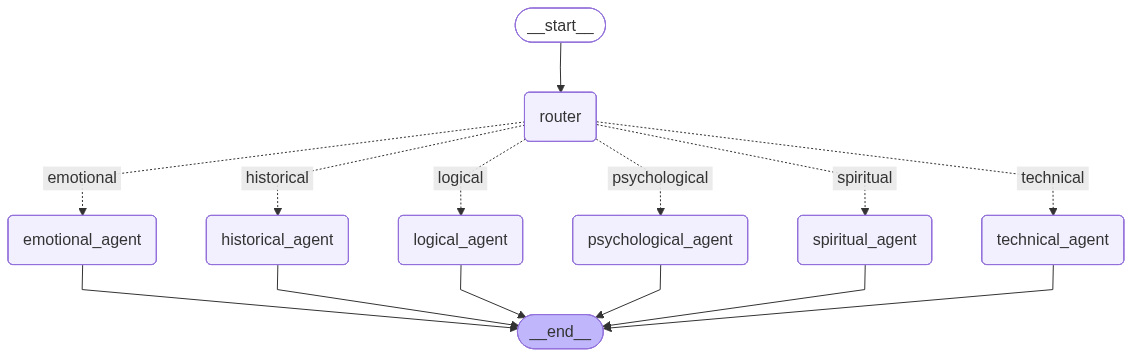

In [68]:
app = graph.compile()
app

In [69]:
user_query = "how are humans different from animals?"

response = app.invoke({
    "query": HumanMessage(content=user_query)
})

✅✅Logical agent invoked


In [70]:
print(response["response"].content)

Okay, let's break down the differences between humans and animals. It’s a complex topic, but we can approach it systematically. Here’s a breakdown of key areas, focusing on demonstrable differences and evolutionary reasoning:

**1. Cognitive Abilities – The Core of the Difference**

* **Abstract Thought & Reasoning:** This is arguably the *most* significant difference. Humans possess a significantly higher capacity for abstract thought, hypothetical reasoning, and symbolic representation. We can:
    * **Reason about hypothetical scenarios:** We can contemplate "what if" and extrapolate.
    * **Understand and use complex concepts:** We grasp concepts like justice, morality, and symbolism.
    * **Plan and strategize:**  We can create long-term plans and anticipate consequences.
* **Language & Symbolic Communication:**  Humans have evolved language – a complex system of symbols – to transmit knowledge, ideas, and history across generations.  Animals communicate, but it's generally less